In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def powerIteration(pi_0: np.ndarray, P: np.ndarray, N: int = 10**3):
    pi_current = pi_0
    for i in range(1, N+1):
        pi_last = pi_current
        pi_current = np.matmul(pi_last, P)
    return pi_current

In [27]:
n = 10
pi_0 = np.array([1/n for i in range(n)])
pi = []
for p in [0.25,0.5,0.75]:
    transitionMatrix = np.zeros((n,n))
    for i in range(n):
        transitionMatrix[i,0] = 1-p
        transitionMatrix[i, i+1 if i+1 < n else n-1] = p
    pi.append(powerIteration(pi_0, transitionMatrix))
    print(f"p: {p}\npi: {pi}\nP: {transitionMatrix}\n\n")

p: 0.25
pi: [array([7.50000000e-01, 1.87500000e-01, 4.68750000e-02, 1.17187500e-02,
       2.92968750e-03, 7.32421875e-04, 1.83105469e-04, 4.57763672e-05,
       1.14440918e-05, 3.81469727e-06])]
P: [[0.75 0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.25]]


p: 0.5
pi: [array([7.50000000e-01, 1.87500000e-01, 4.68750000e-02, 1.17187500e-02,
       2.92968750e-03, 7.32421875e-04, 1.83105469e-04, 4.57763672e-05,
       1.14440918e-05, 3.81469727e-06]), array([0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
      

Least likely state: 10
[7.50000000e-01 1.87500000e-01 4.68750000e-02 1.17187500e-02
 2.92968750e-03 7.32421875e-04 1.83105469e-04 4.57763672e-05
 1.14440918e-05 3.81469727e-06]


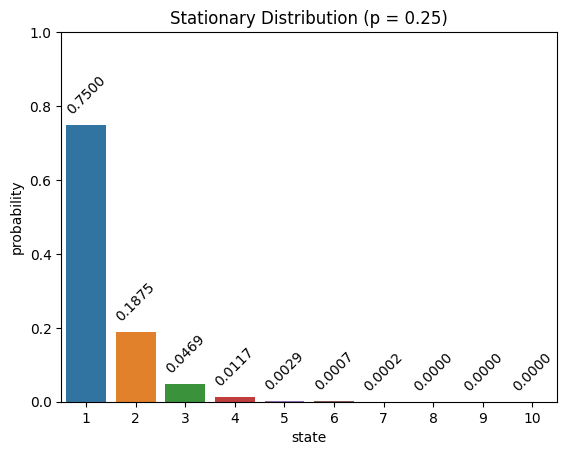

In [28]:
pi_ = pi[0]
sns.barplot(x = list(range(1, n+1)), y = pi_)
plt.ylim([0,1])
plt.title("Stationary Distribution (p = 0.25)")
plt.xlabel("state")
plt.ylabel("probability")
ax = plt.gca()  # Obter o eixo atual
for i in range(len(pi_)):
    ax.text(i, pi_[i] + 0.03, f"{pi_[i]:.4f}", ha='center', rotation = 45)
print(f"Least likely state: {pi_.argmin() + 1}")
print(pi_)

Least likely state: 10
[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195313 0.00195312]


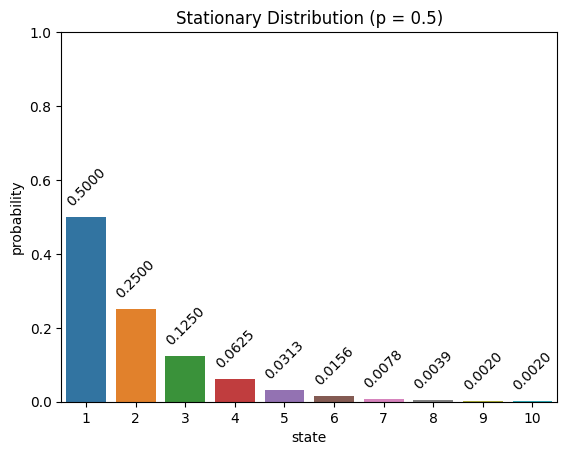

In [31]:
pi_ = pi[1]
sns.barplot(x = list(range(1, n+1)), y = pi_)
plt.ylim([0,1])
plt.title("Stationary Distribution (p = 0.5)")
plt.xlabel("state")
plt.ylabel("probability")
ax = plt.gca()  # Obter o eixo atual
for i in range(len(pi_)):
    ax.text(i, pi_[i] + 0.03, f"{pi_[i]:.4f}", ha='center', rotation = 45)
print(f"Least likely state: {pi_.argmin() + 1}")
print(pi_)

Least likely state: 9
[0.25       0.1875     0.140625   0.10546875 0.07910156 0.05932617
 0.04449463 0.03337097 0.02502823 0.07508469]


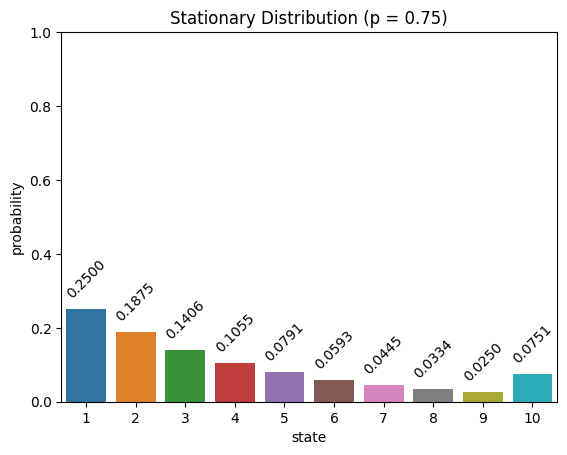

In [30]:
pi_ = pi[2]
sns.barplot(x = list(range(1, n+1)), y = pi_)
plt.ylim([0,1])
plt.title("Stationary Distribution (p = 0.75)")
plt.xlabel("state")
plt.ylabel("probability")
ax = plt.gca()  # Obter o eixo atual
for i in range(len(pi_)):
    ax.text(i, pi_[i] + 0.03, f"{pi_[i]:.4f}", ha='center', rotation = 45)
print(f"Least likely state: {pi_.argmin() + 1}")
print(pi_)

In [36]:
p = 0.25
n = 10
transitionMatrix = np.zeros((n,n))
for i in range(n):
    transitionMatrix[i,0] = 1-p
    transitionMatrix[i, i+1 if i+1 < n else n-1] = p
pi_0 = np.array([1/n for i in range(n)])
pi = powerIteration(pi_0, transitionMatrix)

In [37]:
powerIteration(pi_0, transitionMatrix, N = 14) - pi

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.71050543e-20, -6.77626358e-21,
        0.00000000e+00, -1.69406589e-21])